# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_06_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [66]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to categories if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [67]:
#Convert numbers
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
#Convert catagorical
cata_cols = ['order_type', 'customer_name', 'city', 'state_province', 'email', 'product_name', 'product_line', 'product_status']
for col in cata_cols:
  df[col] = df[col].astype('category')
df.dtypes
#Outliers
q1=df['product_price'].quantile(0.25)
q3=df['product_price'].quantile(0.75)
iqr=q3-q1
up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr
df = df[(df['product_price'] > low_bound) & (df['product_price'] < up_bound)]

order_date = pd.to_datetime(df['order_date'], errors='coerce').dt.year
df = df[(order_date >= 2022) & (order_date <= 2024)]

#Remove NULL
df_clean = df.dropna()
#Create total_amount
df_clean['total_amount'] = df_clean['product_price'] * df_clean['quantity']
df_clean.head()

<ipython-input-67-893d2d0fdc61>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_amount'] = df_clean['product_price'] * df_clean['quantity']


,order_id,order_date,order_year_month,customer_name,city,state_province,email,order_type,quantity,product_name,product_line,product_price,product_status,total_amount
0,51188,2023-07-01,2023-07,Audrey Blanco,North Cherylmouth,New Hampshire,audrey_blanco@email.com,Retail,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,1949.97
1,51187,2023-07-01,2023-07,Isaac Allen,Traceyland,West Virginia,isaac_allen@email.com,Online,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,2599.96
2,51199,2023-07-02,2023-07,Ian Morgan,Dylanberg,South Dakota,ian_morgan@email.com,Online,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,3249.95
3,51241,2023-07-04,2023-07,Alexa Bell,Lake Tracytown,Wisconsin,alexa_bell@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99
4,51297,2023-07-08,2023-07,Casey Diaz,Byrdchester,Mississippi,casey_diaz@email.com,Online,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,Active,649.99


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

<ipython-input-68-e4fa4fd59722>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_line_sales = df_clean.groupby('product_line')['total_amount'].sum().reset_index()


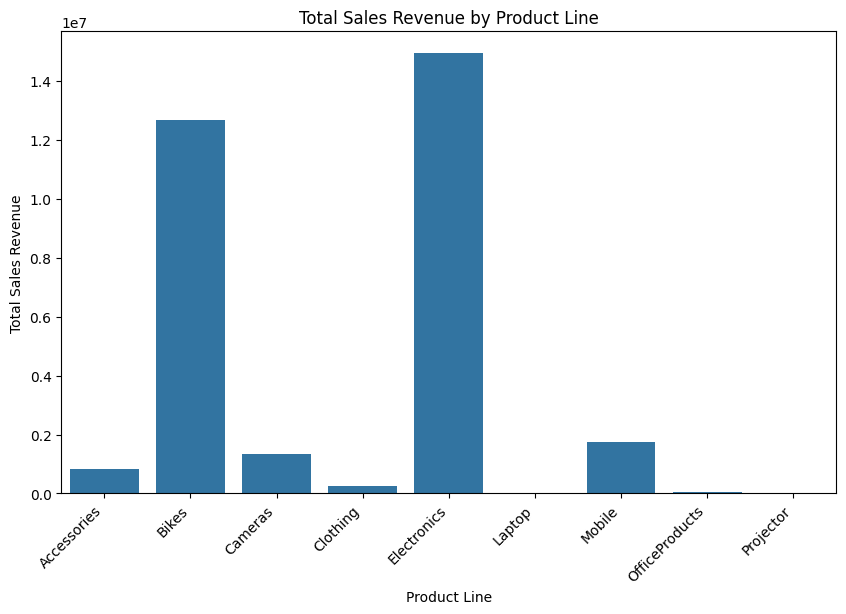

In [68]:
#chart 1
product_line_sales = df_clean.groupby('product_line')['total_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='product_line', y='total_amount', data=product_line_sales)
plt.xlabel('Product Line')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Product Line')
plt.xticks(rotation=45,ha='right')
plt.show()

<ipython-input-69-518f65373138>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_type_sales = df_clean.groupby('order_type')['total_amount'].sum().reset_index()


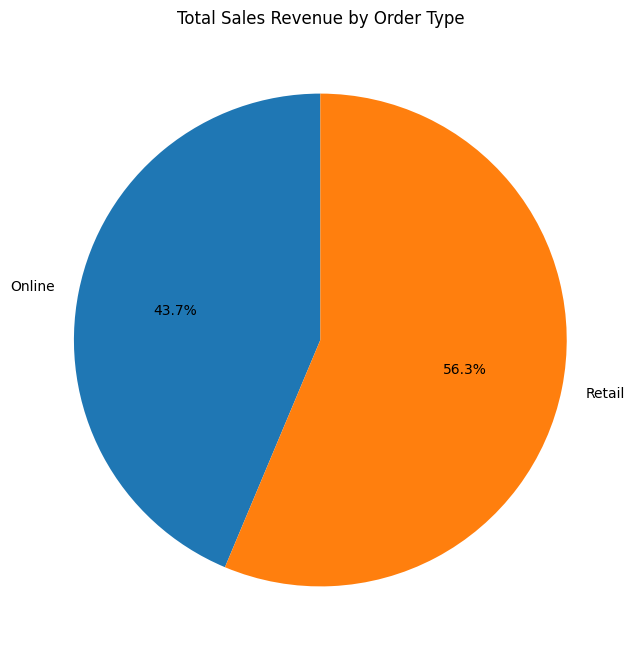

In [69]:
#chart 2
order_type_sales = df_clean.groupby('order_type')['total_amount'].sum().reset_index()
plt.figure(figsize=(8,8))
plt.pie(order_type_sales['total_amount'], labels=order_type_sales['order_type'], autopct='%1.1f%%', startangle=90)
plt.title('Total Sales Revenue by Order Type')
plt.show()

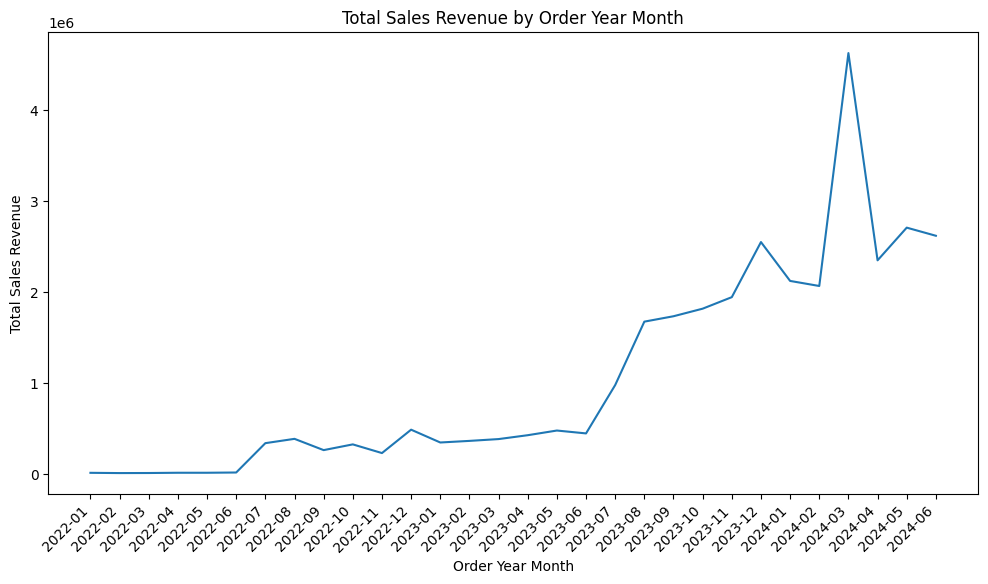

In [70]:
#chart 3
monthly_sales = df_clean.groupby('order_year_month')['total_amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_year_month', y='total_amount', data=monthly_sales)
plt.xlabel('Order Year Month')
plt.ylabel('Total Sales Revenue')
plt.title('Total Sales Revenue by Order Year Month')
plt.xticks(rotation=45,ha='right')
plt.show()

## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  


In [74]:
ind_vars = [
    'quantity', 'product_price'
]
cov_matrix = df_clean[ind_vars].cov()
cov_matrix

,quantity,product_price
quantity,195164.481415,-1134.802424
product_price,-1134.802424,416262.982998


The covariance matrix shows the relationship between quantity and product price. In this case specifically, it shows that the price of products has a negative correlation to the quantity that's bought by customers, suggesting that as the price increases, the quantity sold tends to decrease.
